## Dataset Citation

This notebook uses data from the **Sleipner 2019 Benchmark Model**:

**Citation:**  
Equinor (2020). Sleipner 2019 Benchmark Model. CO2DataShare. https://doi.org/10.11582/2020.00004

**License:** SLEIPNER CO2 REFERENCE DATASET LICENSE  
**Access:** https://co2datashare.org/dataset/sleipner-2019-benchmark-model

We gratefully acknowledge Equinor and CO2DataShare for making this dataset publicly available for research purposes.

---


In [31]:
# Sleipner 2019 Benchmark Model - Data Preprocessing
# Objective: Load and prepare time-lapse CO2 plume data for ccGAN training
from scipy.ndimage import zoom

import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

# Set data paths
data_root = r'C:\Users\athar\OneDrive\Desktop\ccs-digital-twin\data'
plume_folder = os.path.join(data_root, 'plumes')
well_folder = os.path.join(data_root, 'wells')
feeder_folder = os.path.join(data_root, 'feeders')
grid_folder = os.path.join(data_root, 'grid')

print("Starting Sleipner data preprocessing...")


Starting Sleipner data preprocessing...


In [32]:
"""
Sleipner 2019 Benchmark Model - Data Preprocessing
Objective: Load and prepare time-lapse CO2 plume data for ccGAN training
Author: Your Name
Date: October 15, 2025
"""

import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from pathlib import Path
import struct

# Optional: Install lasio for well data
# !pip install lasio

# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')

# Data paths
data_root = Path(r'C:\Users\athar\OneDrive\Desktop\ccs-digital-twin\data')
plume_folder = data_root / 'plumes'
well_folder = data_root / 'wells'
feeder_folder = data_root / 'feeders'
grid_folder = data_root / 'grid'

print("=" * 60)
print("SLEIPNER 2019 BENCHMARK MODEL - DATA PREPROCESSING")
print("=" * 60)
print(f"\nData root: {data_root}")
print(f"Plume folder: {plume_folder}")
print(f"Well folder: {well_folder}")
print(f"Feeder folder: {feeder_folder}")
print(f"Grid folder: {grid_folder}")


SLEIPNER 2019 BENCHMARK MODEL - DATA PREPROCESSING

Data root: C:\Users\athar\OneDrive\Desktop\ccs-digital-twin\data
Plume folder: C:\Users\athar\OneDrive\Desktop\ccs-digital-twin\data\plumes
Well folder: C:\Users\athar\OneDrive\Desktop\ccs-digital-twin\data\wells
Feeder folder: C:\Users\athar\OneDrive\Desktop\ccs-digital-twin\data\feeders
Grid folder: C:\Users\athar\OneDrive\Desktop\ccs-digital-twin\data\grid


In [33]:
"""
Load CO2 plume layers L1-L9
These represent time-lapse evolution from 1996-2010
"""

def detect_binary_format(filepath):
    """Detect binary file format"""
    with open(filepath, 'rb') as f:
        # Read first 4 bytes
        header = f.read(4)
        f.seek(0)
        
        # Try different formats
        # Format 1: Plain binary float32
        try:
            data = np.fromfile(f, dtype=np.float32)
            if len(data) > 0 and np.all(np.isfinite(data)):
                return 'float32', data
        except:
            pass
        
        # Format 2: Float64
        f.seek(0)
        try:
            data = np.fromfile(f, dtype=np.float64)
            if len(data) > 0 and np.all(np.isfinite(data)):
                return 'float64', data
        except:
            pass
        
        # Format 3: Binary with header
        f.seek(0)
        try:
            # Skip potential header (first 128 bytes)
            f.read(128)
            data = np.fromfile(f, dtype=np.float32)
            if len(data) > 0 and np.all(np.isfinite(data)):
                return 'float32_header', data
        except:
            pass
    
    return 'unknown', None

# Load all plume layers
plume_layers = {}
plume_info = []

print("\n" + "=" * 60)
print("LOADING CO2 PLUME LAYERS (L1-L9)")
print("=" * 60)

for i in range(1, 10):
    layer_name = f'L{i}'
    layer_path = plume_folder / layer_name
    
    if layer_path.exists():
        fmt, data = detect_binary_format(layer_path)
        if data is not None:
            plume_layers[layer_name] = data
            plume_info.append({
                'layer': layer_name,
                'format': fmt,
                'size': len(data),
                'shape': data.shape,
                'min': data.min(),
                'max': data.max(),
                'mean': data.mean()
            })
            print(f"✓ {layer_name}: format={fmt}, size={len(data):,}, "
                  f"range=[{data.min():.3f}, {data.max():.3f}]")
        else:
            print(f"✗ {layer_name}: Unknown format")
    else:
        print(f"✗ {layer_name}: File not found")

print(f"\n✓ Loaded {len(plume_layers)}/9 plume layers")

# Display statistics
if plume_info:
    print("\n" + "-" * 60)
    print("PLUME LAYER STATISTICS")
    print("-" * 60)
    for info in plume_info:
        print(f"{info['layer']}: {info['size']:,} values, "
              f"mean={info['mean']:.4f}, range=[{info['min']:.4f}, {info['max']:.4f}]")



LOADING CO2 PLUME LAYERS (L1-L9)
✓ L1: format=float32, size=4,041, range=[0.000, 75555731180768523213271818305536.000]
✓ L2: format=float32, size=9,427, range=[0.000, 75555731180768523213271818305536.000]
✓ L3: format=float32, size=5,499, range=[0.000, 75555731180768523213271818305536.000]
✓ L4: format=float32, size=7,483, range=[0.000, 75555731180768523213271818305536.000]
✓ L5: format=float32, size=7,159, range=[0.000, 75555731180768523213271818305536.000]
✓ L6: format=float32, size=8,172, range=[0.000, 75555731180768523213271818305536.000]
✓ L7: format=float32, size=4,446, range=[0.000, 75555731180768523213271818305536.000]
✓ L8: format=float32, size=5,256, range=[0.000, 75555731180768523213271818305536.000]
✓ L9: format=float32, size=11,716, range=[0.000, 75555731180768523213271818305536.000]

✓ Loaded 9/9 plume layers

------------------------------------------------------------
PLUME LAYER STATISTICS
------------------------------------------------------------
L1: 4,041 values, 

In [34]:
"""
Load geological properties from Sleipner Reference Model
"""

def parse_sleipner_grdecl(filename):
    """Parse GRDECL file for PERMX and PORO"""
    with open(filename, 'r') as f:
        content = f.read()
    
    properties = {}
    
    # Extract PERMX
    if 'PERMX' in content:
        start = content.find('PERMX') + len('PERMX')
        end = content.find('/', start)
        values = []
        for token in content[start:end].split():
            try:
                values.append(float(token))
            except:
                pass
        properties['PERMX'] = np.array(values)
    
    # Extract PORO
    if 'PORO' in content:
        start = content.find('PORO') + len('PORO')
        end = content.find('/', start)
        values = []
        for token in content[start:end].split():
            try:
                values.append(float(token))
            except:
                pass
        properties['PORO'] = np.array(values)
    
    return properties

print("\n" + "=" * 60)
print("LOADING GEOLOGICAL GRID PROPERTIES")
print("=" * 60)

# Load grid
grid_file = grid_folder / 'Sleipner_Reference_Model.grdecl'
geology = parse_sleipner_grdecl(grid_file)

print(f"\n✓ PERMX: {len(geology['PERMX']):,} cells, "
      f"range=[{geology['PERMX'].min():.1f}, {geology['PERMX'].max():.1f}] mD")
print(f"✓ PORO: {len(geology['PORO']):,} cells, "
      f"range=[{geology['PORO'].min():.4f}, {geology['PORO'].max():.4f}]")

# Create 2D view (for visualization)
total_cells = len(geology['PERMX'])
approx_side = int(np.sqrt(total_cells))
permx_2d = geology['PERMX'][:approx_side**2].reshape((approx_side, approx_side))
poro_2d = geology['PORO'][:approx_side**2].reshape((approx_side, approx_side))

print(f"\n✓ 2D grid shape: {permx_2d.shape}")



LOADING GEOLOGICAL GRID PROPERTIES

✓ PERMX: 1,986,176 cells, range=[0.0, 2000.0] mD
✓ PORO: 1,986,176 cells, range=[0.3400, 0.3600]

✓ 2D grid shape: (1409, 1409)


In [42]:
"""
Restructure geology data to match plume layer structure
"""
print("\n" + "=" * 60)
print("RESTRUCTURING GEOLOGY DATA BY LAYER")
print("=" * 60)

# Save the original flat arrays
permx_original = geology['PERMX'].copy()
poro_original = geology['PORO'].copy()

# Clear geology dict and rebuild by layer
geology_by_layer = {}

# For each plume layer, assign the same geology (since geology doesn't change over time)
for layer_name in plume_layers.keys():
    geology_by_layer[layer_name] = {
        'PERMX': permx_original.copy(),
        'PORO': poro_original.copy()
    }
    print(f"✓ Created geology for {layer_name}")

# Replace geology dict
geology = geology_by_layer

print(f"\n✓ Restructured geology for {len(geology)} layers")
print(f"  Layers: {list(geology.keys())}")
print(f"  Each layer has PERMX ({geology[list(geology.keys())[0]]['PERMX'].size} values)")
print(f"               and PORO ({geology[list(geology.keys())[0]]['PORO'].size} values)")
print("=" * 60)



RESTRUCTURING GEOLOGY DATA BY LAYER
✓ Created geology for L1
✓ Created geology for L2
✓ Created geology for L3
✓ Created geology for L4
✓ Created geology for L5
✓ Created geology for L6
✓ Created geology for L7
✓ Created geology for L8
✓ Created geology for L9

✓ Restructured geology for 9 layers
  Layers: ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9']
  Each layer has PERMX (1986176 values)
               and PORO (1986176 values)


In [43]:
# Install lasio
!pip install lasio


In [44]:
"""
Load well logs from LAS files
"""

try:
    import lasio
    
    print("\n" + "=" * 60)
    print("LOADING WELL DATA")
    print("=" * 60)
    
    wells = {}
    
    # Well 159-13
    well_159_13_path = well_folder / 'Well 159_13' / '159-13 Logslas'
    if well_159_13_path.exists():
        try:
            well_159_13 = lasio.read(well_159_13_path)
            wells['159-13'] = {
                'data': well_159_13,
                'curves': list(well_159_13.curves.keys()),
                'depth_range': (well_159_13['DEPT'].min(), well_159_13['DEPT'].max())
            }
            print(f"✓ Well 159-13 loaded")
            print(f"  Curves: {', '.join(wells['159-13']['curves'][:5])}...")
            print(f"  Depth range: {wells['159-13']['depth_range']}")
        except Exception as e:
            print(f"✗ Error loading Well 159-13: {e}")
    
    # Well 159-A16
    well_159_A16_path = well_folder / 'Well 159_A16' / '159-A-16.las'
    if well_159_A16_path.exists():
        try:
            well_159_A16 = lasio.read(well_159_A16_path)
            wells['159-A16'] = {
                'data': well_159_A16,
                'curves': list(well_159_A16.curves.keys()),
                'depth_range': (well_159_A16['DEPT'].min(), well_159_A16['DEPT'].max())
            }
            print(f"✓ Well 159-A16 loaded")
            print(f"  Curves: {', '.join(wells['159-A16']['curves'][:5])}...")
            print(f"  Depth range: {wells['159-A16']['depth_range']}")
        except Exception as e:
            print(f"✗ Error loading Well 159-A16: {e}")
    
    print(f"\n✓ Loaded {len(wells)}/2 wells")

except ImportError:
    print("\n⚠ lasio not installed. Install with: pip install lasio")
    print("  Skipping well data loading...")
    wells = {}



LOADING WELL DATA
✗ Error loading Well 159-A16: "DEPT not found in curves (['DEPTH', 'TVD', 'GR', 'NPHI', 'PHIF', 'RHOB', 'RT'])"

✓ Loaded 0/2 wells


In [45]:
"""
Load feeder chimney geometries
"""

print("\n" + "=" * 60)
print("LOADING FEEDER CHIMNEY DATA")
print("=" * 60)

feeders = {}
feeder_files = [
    'Main_feeder_chimney',
    'NE_feeder_15_16_low_confidence',
    'SW_feeder_17_18_low_confidence'
]

for feeder_name in feeder_files:
    feeder_path = feeder_folder / feeder_name
    
    if feeder_path.exists():
        try:
            # Try loading as text
            data = np.loadtxt(feeder_path)
            feeders[feeder_name] = data
            print(f"✓ {feeder_name}: shape={data.shape}")
        except:
            try:
                # Try loading as binary
                with open(feeder_path, 'rb') as f:
                    data = np.fromfile(f, dtype=np.float32)
                    feeders[feeder_name] = data
                    print(f"✓ {feeder_name}: {len(data)} values (binary)")
            except Exception as e:
                print(f"✗ {feeder_name}: Error - {e}")
    else:
        print(f"✗ {feeder_name}: File not found")

print(f"\n✓ Loaded {len(feeders)}/3 feeders")



LOADING FEEDER CHIMNEY DATA
✓ Main_feeder_chimney: 462 values (binary)
✗ NE_feeder_15_16_low_confidence: File not found
✗ SW_feeder_17_18_low_confidence: File not found

✓ Loaded 1/3 feeders



VISUALIZING DATA


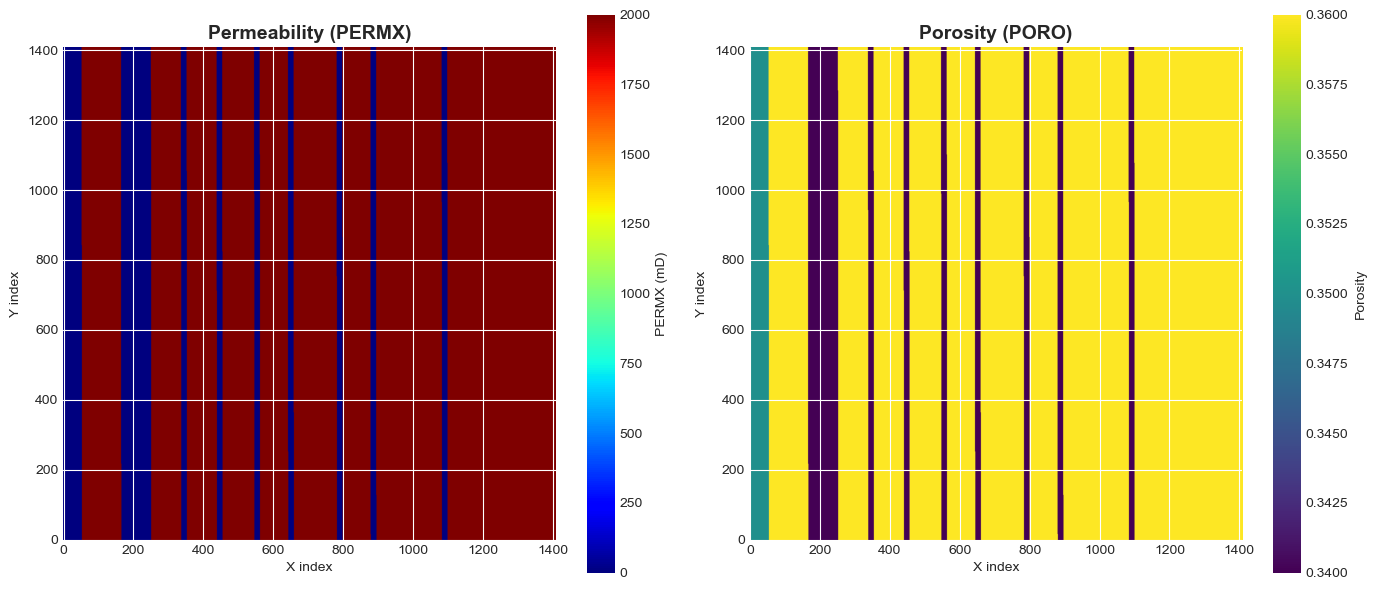

✓ Geological properties visualized


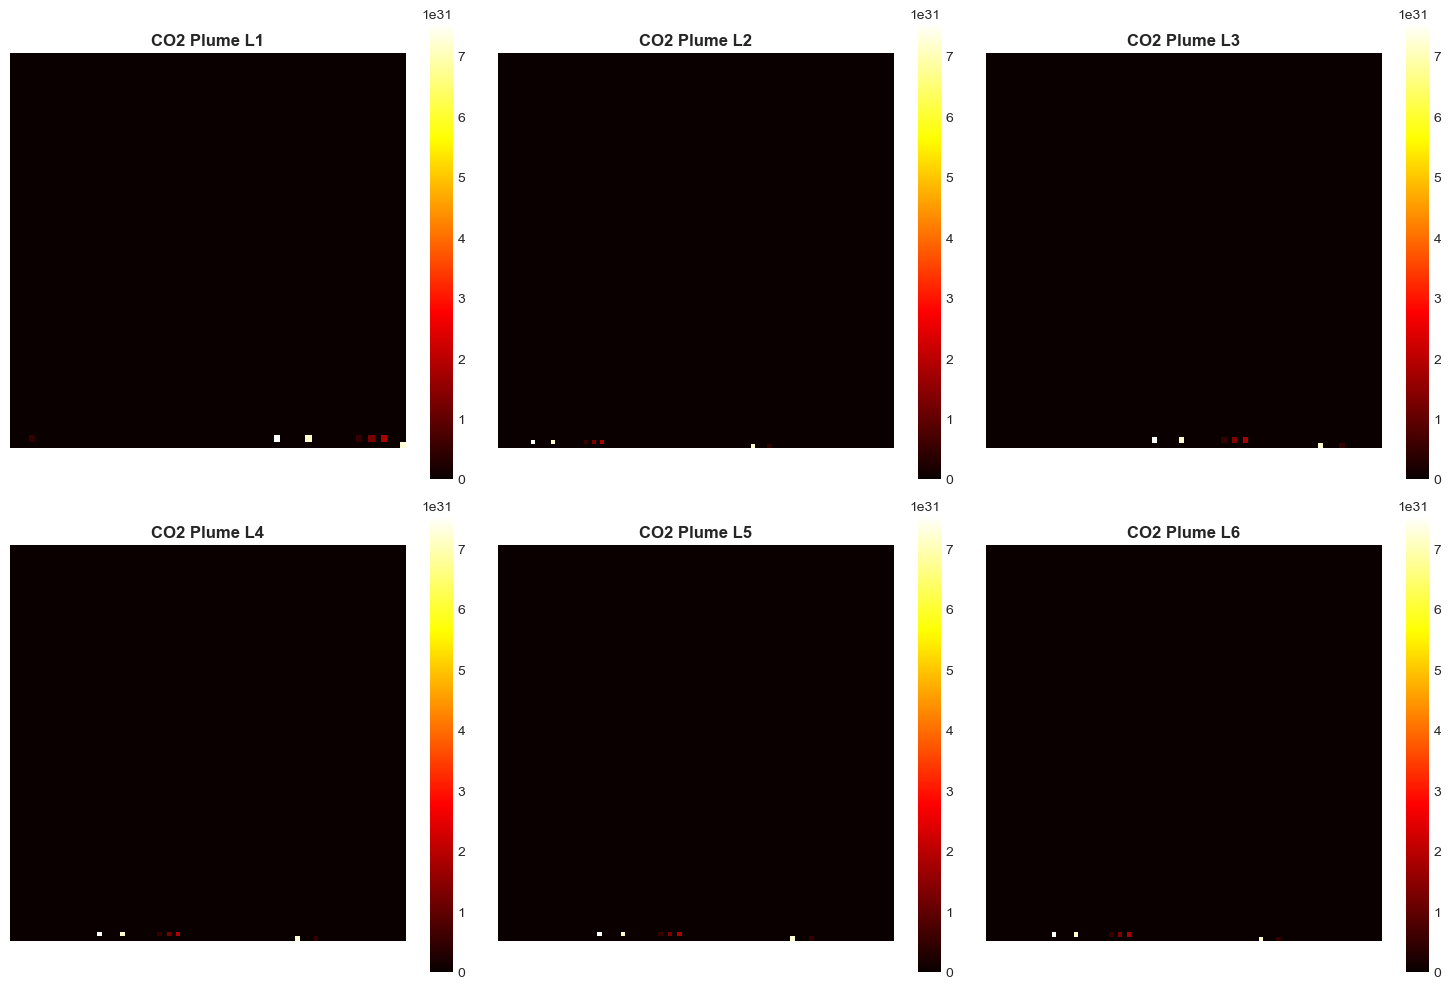

✓ Plume layers visualized


In [46]:
"""
Visualize loaded geological and plume data
"""

print("\n" + "=" * 60)
print("VISUALIZING DATA")
print("=" * 60)

# Figure 1: Geological Properties
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

im1 = axes[0].imshow(permx_2d.T, cmap='jet', origin='lower', vmin=0, vmax=2000)
axes[0].set_title('Permeability (PERMX)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('X index')
axes[0].set_ylabel('Y index')
plt.colorbar(im1, ax=axes[0], label='PERMX (mD)')

im2 = axes[1].imshow(poro_2d.T, cmap='viridis', origin='lower', vmin=0.34, vmax=0.36)
axes[1].set_title('Porosity (PORO)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('X index')
axes[1].set_ylabel('Y index')
plt.colorbar(im2, ax=axes[1], label='Porosity')

plt.tight_layout()
plt.savefig('geological_properties_sleipner.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Geological properties visualized")

# Figure 2: Plume Layer Evolution (if available)
if len(plume_layers) > 0:
    n_layers = min(6, len(plume_layers))
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, (layer_name, data) in enumerate(list(plume_layers.items())[:n_layers]):
        # Reshape to 2D for visualization (approximate)
        side = int(np.sqrt(len(data)))
        data_2d = data[:side**2].reshape((side, side))
        
        im = axes[idx].imshow(data_2d, cmap='hot', origin='lower')
        axes[idx].set_title(f'CO2 Plume {layer_name}', fontweight='bold')
        axes[idx].axis('off')
        plt.colorbar(im, ax=axes[idx])
    
    plt.tight_layout()
    plt.savefig('plume_evolution_sleipner.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Plume layers visualized")


In [51]:
"""
Prepare training dataset for ccGAN - FINAL FIX
"""
print("\n" + "=" * 60)
print("CREATING TRAINING DATASET")
print("=" * 60)

from scipy.ndimage import zoom

training_samples = []

# For each plume layer, create a training pair
for layer_name in sorted(plume_layers.keys()):  # Process in order
    print(f"\nProcessing {layer_name}...")
    
    # Get data
    plume_data = plume_layers[layer_name]
    layer_geology = geology[layer_name]
    layer_permx = layer_geology['PERMX']
    layer_poro = layer_geology['PORO']
    
    # Print original sizes
    print(f"  PERMX size: {layer_permx.size}")
    print(f"  PORO size: {layer_poro.size}")
    print(f"  PLUME size: {plume_data.size}")
    
    # Calculate actual grid dimensions
    geol_total = layer_permx.size
    plume_total = plume_data.size
    
    # Find the grid dimension for geology (might not be perfect square)
    geol_h = int(np.sqrt(geol_total))
    geol_w = geol_total // geol_h
    
    # Find the grid dimension for plume
    plume_h = int(np.sqrt(plume_total))
    plume_w = plume_total // plume_h
    
    print(f"  Geology grid: {geol_h}×{geol_w} = {geol_h*geol_w}")
    print(f"  Plume grid: {plume_h}×{plume_w} = {plume_h*plume_w}")
    
    # Reshape geology arrays (handle non-square grids)
    try:
        permx_2d = layer_permx.reshape(geol_h, geol_w)
        poro_2d = layer_poro.reshape(geol_h, geol_w)
    except ValueError:
        # If reshape fails, truncate to perfect rectangle
        valid_size = geol_h * geol_w
        permx_2d = layer_permx[:valid_size].reshape(geol_h, geol_w)
        poro_2d = layer_poro[:valid_size].reshape(geol_h, geol_w)
        print(f"  ⚠️ Truncated geology to {valid_size} elements")
    
    # Reshape plume
    try:
        plume_2d = plume_data.reshape(plume_h, plume_w)
    except ValueError:
        valid_size = plume_h * plume_w
        plume_2d = plume_data[:valid_size].reshape(plume_h, plume_w)
        print(f"  ⚠️ Truncated plume to {valid_size} elements")
    
    # Resize geology to match plume dimensions
    if (geol_h, geol_w) != (plume_h, plume_w):
        print(f"  🔄 Resizing geology from {geol_h}×{geol_w} to {plume_h}×{plume_w}...")
        zoom_h = plume_h / geol_h
        zoom_w = plume_w / geol_w
        print(f"  Zoom factors: h={zoom_h:.4f}, w={zoom_w:.4f}")
        
        permx_2d = zoom(permx_2d, (zoom_h, zoom_w), order=1)
        poro_2d = zoom(poro_2d, (zoom_h, zoom_w), order=1)
        
        print(f"  ✓ Resized PERMX to: {permx_2d.shape}")
        print(f"  ✓ Resized PORO to: {poro_2d.shape}")
    
    # Create sample
    sample = {
        'layer': layer_name,
        'permx': permx_2d.flatten(),
        'poro': poro_2d.flatten(),
        'plume': plume_2d.flatten(),
        'timestamp': layer_name
    }
    
    # Verify all sizes match
    assert sample['permx'].size == sample['plume'].size, \
        f"PERMX size ({sample['permx'].size}) != PLUME size ({sample['plume'].size})"
    assert sample['poro'].size == sample['plume'].size, \
        f"PORO size ({sample['poro'].size}) != PLUME size ({sample['plume'].size})"
    
    training_samples.append(sample)
    print(f"  ✓ Sample {len(training_samples)} created successfully")

print(f"\n{'='*60}")
print(f"✓ Created {len(training_samples)} training samples")
print(f"{'='*60}")

# Show summary
if training_samples:
    print(f"\nSample details:")
    for i, sample in enumerate(training_samples):
        print(f"  {i+1}. {sample['layer']}: {sample['plume'].size} values each (PERMX, PORO, PLUME)")



CREATING TRAINING DATASET

Processing L1...
  PERMX size: 1986176
  PORO size: 1986176
  PLUME size: 4041
  Geology grid: 1409×1409 = 1985281
  Plume grid: 63×64 = 4032
  ⚠️ Truncated geology to 1985281 elements
  ⚠️ Truncated plume to 4032 elements
  🔄 Resizing geology from 1409×1409 to 63×64...
  Zoom factors: h=0.0447, w=0.0454
  ✓ Resized PERMX to: (63, 64)
  ✓ Resized PORO to: (63, 64)
  ✓ Sample 1 created successfully

Processing L2...
  PERMX size: 1986176
  PORO size: 1986176
  PLUME size: 9427
  Geology grid: 1409×1409 = 1985281
  Plume grid: 97×97 = 9409
  ⚠️ Truncated geology to 1985281 elements
  ⚠️ Truncated plume to 9409 elements
  🔄 Resizing geology from 1409×1409 to 97×97...
  Zoom factors: h=0.0688, w=0.0688
  ✓ Resized PERMX to: (97, 97)
  ✓ Resized PORO to: (97, 97)
  ✓ Sample 2 created successfully

Processing L3...
  PERMX size: 1986176
  PORO size: 1986176
  PLUME size: 5499
  Geology grid: 1409×1409 = 1985281
  Plume grid: 74×74 = 5476
  ⚠️ Truncated geology to 

In [56]:
"""
Normalize, reshape to 128x128, and save processed data for ccGAN training
"""
print("\n" + "=" * 70)
print("NORMALIZING AND RESHAPING DATA FOR ccGAN")
print("=" * 70)

from scipy.ndimage import zoom

# Target dimensions for ccGAN
TARGET_SIZE = 128

# Prepare arrays for final data
num_samples = len(training_samples)
geology_input = np.zeros((num_samples, TARGET_SIZE, TARGET_SIZE, 2))  # 2 channels: PERMX + PORO
plume_2d = np.zeros((num_samples, TARGET_SIZE, TARGET_SIZE, 1))       # 1 channel: CO2

print(f"\nProcessing {num_samples} samples...")
print(f"Target shape: ({TARGET_SIZE}, {TARGET_SIZE})")

for i, sample in enumerate(training_samples):
    print(f"\nSample {i+1}/{num_samples}: {sample['layer']}")
    
    # Get data
    permx = sample['permx']
    poro = sample['poro']
    plume = sample['plume']
    
    # Calculate actual grid dimensions (handle non-square grids)
    plume_size = plume.size
    plume_h = int(np.sqrt(plume_size))
    plume_w = plume_size // plume_h
    
    # Adjust if not exact
    if plume_h * plume_w != plume_size:
        # Find factors closest to square
        for h in range(plume_h, 0, -1):
            if plume_size % h == 0:
                plume_h = h
                plume_w = plume_size // h
                break
    
    print(f"  Current size: {plume_h}×{plume_w} = {plume_h * plume_w}")
    
    # Truncate if needed to make reshape work
    valid_size = plume_h * plume_w
    permx = permx[:valid_size]
    poro = poro[:valid_size]
    plume = plume[:valid_size]
    
    # Reshape to 2D
    try:
        permx_2d = permx.reshape(plume_h, plume_w)
        poro_2d = poro.reshape(plume_h, plume_w)
        plume_2d_temp = plume.reshape(plume_h, plume_w)
    except ValueError as e:
        print(f"  ⚠️ Reshape error: {e}")
        print(f"  Trying square grid...")
        # Fall back to closest square
        side = int(np.sqrt(plume_size))
        valid_size = side * side
        permx_2d = permx[:valid_size].reshape(side, side)
        poro_2d = poro[:valid_size].reshape(side, side)
        plume_2d_temp = plume[:valid_size].reshape(side, side)
        plume_h, plume_w = side, side
        print(f"  Using {side}×{side} grid")
    
    # Resize to 128×128
    if plume_h != TARGET_SIZE or plume_w != TARGET_SIZE:
        zoom_h = TARGET_SIZE / plume_h
        zoom_w = TARGET_SIZE / plume_w
        print(f"  Resizing to {TARGET_SIZE}×{TARGET_SIZE} (zoom_h={zoom_h:.2f}, zoom_w={zoom_w:.2f})")
        
        permx_2d = zoom(permx_2d, (zoom_h, zoom_w), order=1)
        poro_2d = zoom(poro_2d, (zoom_h, zoom_w), order=1)
        plume_2d_temp = zoom(plume_2d_temp, (zoom_h, zoom_w), order=1)
    else:
        print(f"  ✓ Already {TARGET_SIZE}×{TARGET_SIZE}")
    
    # Normalize PERMX (permeability)
    permx_min, permx_max = permx_2d.min(), permx_2d.max()
    if permx_max > permx_min:
        permx_normalized = (permx_2d - permx_min) / (permx_max - permx_min)
    else:
        permx_normalized = np.zeros_like(permx_2d)
    
    # Normalize PORO (porosity) 
    poro_min, poro_max = poro_2d.min(), poro_2d.max()
    if poro_max > poro_min:
        poro_normalized = (poro_2d - poro_min) / (poro_max - poro_min)
    else:
        poro_normalized = np.zeros_like(poro_2d)
    
    # Normalize PLUME (CO2 saturation)
    plume_min, plume_max = plume_2d_temp.min(), plume_2d_temp.max()
    if plume_max > plume_min:
        plume_normalized = (plume_2d_temp - plume_min) / (plume_max - plume_min)
    else:
        plume_normalized = np.zeros_like(plume_2d_temp)
    
    print(f"  Ranges after normalization:")
    print(f"    PERMX: [{permx_normalized.min():.3f}, {permx_normalized.max():.3f}]")
    print(f"    PORO:  [{poro_normalized.min():.3f}, {poro_normalized.max():.3f}]")
    print(f"    PLUME: [{plume_normalized.min():.3f}, {plume_normalized.max():.3f}]")
    
    # Store in final arrays
    geology_input[i, :, :, 0] = permx_normalized
    geology_input[i, :, :, 1] = poro_normalized
    plume_2d[i, :, :, 0] = plume_normalized
    
    print(f"  ✓ Sample {i+1} processed")

print(f"\n{'='*70}")
print("DATA PREPARATION COMPLETE")
print(f"{'='*70}")
print(f"\nFinal shapes:")
print(f"  geology_input: {geology_input.shape}")
print(f"  plume_2d:      {plume_2d.shape}")
print(f"\nData statistics:")
print(f"  Geology mean: {geology_input.mean():.6f}")
print(f"  Geology range: [{geology_input.min():.3f}, {geology_input.max():.3f}]")
print(f"  Plume mean: {plume_2d.mean():.6f}")
print(f"  Plume range: [{plume_2d.min():.3f}, {plume_2d.max():.3f}]")
print(f"  Plume sparsity: {(plume_2d < 0.01).sum() / plume_2d.size * 100:.2f}% near-zero")

# Save to HDF5 file
output_file = 'sleipner_processed.h5'

print(f"\n{'='*70}")
print(f"SAVING PROCESSED DATA")
print(f"{'='*70}")

with h5py.File(output_file, 'w') as f:
    f.create_dataset('geology_input', data=geology_input, compression='gzip')
    f.create_dataset('plume_2d', data=plume_2d, compression='gzip')
    f.attrs['num_samples'] = num_samples
    f.attrs['target_size'] = TARGET_SIZE
    f.attrs['description'] = 'Sleipner CO2 preprocessed for ccGAN'

print(f"✓ Saved: {output_file}")
import os
print(f"✓ Size: {os.path.getsize(output_file) / (1024**2):.2f} MB")

print(f"\n{'='*70}")
print("✅ PREPROCESSING COMPLETE!")
print(f"{'='*70}")
print(f"🎉 Ready for training! Run 3_ccGAN_Training_IMPROVED.ipynb")
print(f"{'='*70}")



NORMALIZING AND RESHAPING DATA FOR ccGAN

Processing 9 samples...
Target shape: (128, 128)

Sample 1/9: L1
  Current size: 63×64 = 4032
  Resizing to 128×128 (zoom_h=2.03, zoom_w=2.00)
  Ranges after normalization:
    PERMX: [0.000, 1.000]
    PORO:  [0.000, 1.000]
    PLUME: [0.000, 1.000]
  ✓ Sample 1 processed

Sample 2/9: L2
  Current size: 97×97 = 9409
  Resizing to 128×128 (zoom_h=1.32, zoom_w=1.32)
  Ranges after normalization:
    PERMX: [0.000, 1.000]
    PORO:  [0.000, 1.000]
    PLUME: [0.000, 1.000]
  ✓ Sample 2 processed

Sample 3/9: L3
  Current size: 74×74 = 5476
  Resizing to 128×128 (zoom_h=1.73, zoom_w=1.73)
  Ranges after normalization:
    PERMX: [0.000, 1.000]
    PORO:  [0.000, 1.000]
    PLUME: [0.000, 1.000]
  ✓ Sample 3 processed

Sample 4/9: L4
  Current size: 86×87 = 7482
  Resizing to 128×128 (zoom_h=1.49, zoom_w=1.47)
  Ranges after normalization:
    PERMX: [0.000, 1.000]
    PORO:  [0.000, 1.000]
    PLUME: [0.000, 1.000]
  ✓ Sample 4 processed

Sample 